# Local search

Klasa Problem jest abstrakcyjnym modelem problemu, który można rozwiązać za pomocą algorytmów przeszukiwania. Ta klasa definiuje podstawowe metody, które są wspólne dla różnych problemów, aby umożliwić ich rozwiązanie przy użyciu tych algorytmów.

Metoda `random_state(self)`: Ta metoda generuje losowy stan (random_state). Stan to reprezentacja aktualnego stanu problemu, na podstawie którego algorytmy przeszukiwania podejmują decyzje. Może to być np. układ puzzli, pozycja pionka na planszy czy konfiguracja zadań do wykonania.

Metoda `available_actions(self, state)`: Ta metoda przyjmuje stan jako argument i zwraca listę dostępnych akcji (available_actions) w danym stanie. Akcje to możliwe ruchy lub operacje, które można podjąć w celu zmiany stanu problemu. Na przykład, dla układu puzzli, akcje mogą obejmować przesunięcie fragmentu puzzli o jedno pole w górę, w dół, w lewo lub w prawo.

Metoda `do_action(self, state, action)`: Ta metoda przyjmuje stan i akcję jako argumenty i wykonuje tę akcję na danym stanie, co prowadzi do uzyskania nowego stanu (new_state). Ta metoda symuluje wykonanie akcji w celu przechodzenia z jednego stanu problemu do drugiego.

Metoda `cost(self, state) -> float`: Ta metoda przyjmuje stan jako argument i zwraca koszt (cost) związany z tym stanem. Koszt może być miarą odległości od rozwiązania optymalnego lub innym wskaźnikiem jakości danego stanu. Algorytmy przeszukiwania mogą wykorzystywać ten koszt do oceny stanów i podejmowania decyzji o dalszym przeszukiwaniu.

Klasa Problem jest klasą abstrakcyjną, co oznacza, że nie jest przeznaczona do bezpośredniego tworzenia obiektów tej klasy. Zamiast tego, powinna być dziedziczona przez konkretne klasy reprezentujące konkretne problemy, które implementują te metody zgodnie z logiką danego problemu.

In [16]:
class Problem:
    def random_state(self):
        ...
        
    def available_actions(self, state):
        ...        
        
    def do_action(self, state, action):
        ...
        return new_state
        
    def cost(self, state) -> float:
        ...

W tym zadaniu będziemy używać generatora liczb pseudolosowych. Generator liczb pseudolosowych to algorytm, który w pewnym stanie początkowym (zwykle nazywanym *ziarnem*) zwraca sekwencję liczb. Sam algorytm jest deterministyczny, co oznacza, że ten sam stan początkowy = ten sam ciąg liczb. Aby wykorzystać tę właściwość, w następnej komórce ustawiamy ziarno na 42 — w ten sposób za każdym razem, gdy ponownie uruchomisz notatnik i wykonasz go, uzyskasz te same wyniki.

In [17]:
import random

Jako przykład rozważymy problem znalezienia minimum pewnej funkcji złożonej z 2 zmiennych w dziedzinie liczby całkowitej ze zbioru $\{-10, -9, \ldots, 9, 10\}$.

In [18]:
class FunctionOptimizationProblem:
    def random_state(self):
        x = random.randrange(-10, 11)
        y = random.randrange(-10, 11)
        return (x, y)
    
    def available_actions(self, state):
        x, y = state
        actions = []
        if x > -10:
            actions += [(-1, 0)]
        if y > -10:
            actions += [(0, -1)]
        if x < 10:
            actions += [(1, 0)]
        if y < 10:
            actions += [(0, 1)]
        return actions
    
    def do_action(self, state, action):
        x, y = state
        dx, dy = action
        return (x+dx, y+dy)
    
    def cost(self, state) -> float:
        x, y = state
        cost = -5*x-8*y
        if x+y>6:
            cost += 10000
        if 5*x+9*y>45:
            cost += 10000
        if x < 0:
            cost += 10000
        if y < 0:
            cost += 10000
        return cost

Przetestujmy to trochę. Zaczynamy od stworzenia obiektu reprezentującego problem i wygenerowania dwóch losowych stanów. Zauważ, że są różne.

In [19]:
problem = FunctionOptimizationProblem()
print("Random state 1", problem.random_state())
print("Random state 2", problem.random_state())

Random state 1 (2, 4)
Random state 2 (-1, 10)


<Axes: >

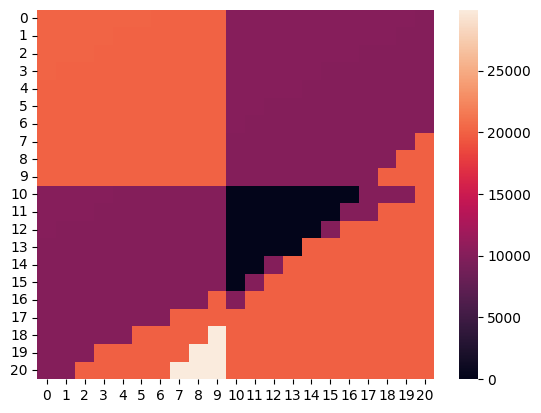

In [20]:
import seaborn as sns
matrix = [[problem.cost((x, y)) for x in range(-10, 11)] for y in range(-10, 11)]
sns.heatmap(matrix)

Teraz obliczmy koszt kilku różnych stanów.

In [21]:
print("The cost of an acceptable state (3, 3):", problem.cost((3, 3)))
print("The cost of a terrible state (3, 7):", problem.cost((3, 7)))
print("The cost of an optimal solution (0, 5):", problem.cost((0, 5)))

The cost of an acceptable state (3, 3): -39
The cost of a terrible state (3, 7): 19929
The cost of an optimal solution (0, 5): -40


## Zadanie 1: Zaimplementujmy `hill climbing`

Uzupełnij poniższą komórkę kodu implementacją algorytmu wspinania się na wzgórze.
Algorytm rozpoczyna się w stanie początkowym danego problemu wyszukiwania „problem” i zapętla się w nieskończoność.
Podczas każdego powtórzenia pętli „rozgląda się” i testuje wszystkie możliwe do osiągnięcia stany poprzez akcje dostępne w bieżącym stanie.
Jeśli żaden z nich nie jest lepszy od stanu bieżącego (tj. algorytm osiągnął szczyt lub plateau zgodnie z funkcją `cost`), przerywa pętlę i zwraca osiągnięty stan.
W przeciwnym razie przechodzi do najlepszego z tych sąsiednich stanów i oblicza następne powtórzenie pętli.

In [22]:
import queue

In [23]:
def hill_climbing(problem):
    return None

Przetestujmy Twoją implementację. Spróbuj uruchomić komórkę wiele razy. Zauważ, że w niektórych przebiegach jest w stanie znaleźć optymalne rozwiązanie. Na innych wynik jest okropny.

In [24]:
problem = FunctionOptimizationProblem()
solution = hill_climbing(problem)
print("Solution", solution)
print("Cost", problem.cost(solution))

Solution (-8, 9)
Cost 9968


## Zadanie 2: Zaimplementujmy `random-restarts hill-climbing`

Wypełnij komórkę poniżej, aby zaimplementować losowe ponowne uruchamianie wspinaczki. Randomizacja jest już uwzględniona w zadaniu, więc w zasadzie twoim zadaniem jest wywołanie `hill_climbing` tyle razy, ile podaje argument `n` i zwrócenie najlepszego rozwiązania.

In [25]:
def random_restarts_hill_climbing(problem: Problem, n: int):
    return None

In [26]:
problem = FunctionOptimizationProblem()
solution = random_restarts_hill_climbing(problem, 100)
print("Solution", solution)
print("Cost", problem.cost(solution))

Solution (0, 5)
Cost -40


## Task 3: The n-queens

Uzupełnij poniższą komórkę kodu implementacją problemu n-królowych. Istota problemu polega na umieszczeniu $n$ hetmanów na $n \times n$ szachownicy tak, aby żaden hetman nie atakował innego. Innymi słowy: w każdym rzędzie, kolumnie i przekątnej szachownicy znajduje się co najwyżej jeden hetman. Wartość $n$ jest podawana jako parametr konstruktora i dostępna w klasie jako `self.n`.

In [27]:
class NQueens(Problem):
    def __init__(self, n):
        self.n = n

    def random_state(self):
        return None

    def available_actions(self, state):
        return None

    def do_action(self, state, action):
        return None

    def cost(self, state) -> float:
        return None

Przetestujmy Twoje rozwiązanie. Jeśli wszystko poszło dobrze, następna komórka powinna zakończyć się po kilku sekundach i dać idealną konfigurację hetmanów na planszy 8 $ \times 8 $.

In [28]:
def visualization(solution, n):
    row = [0 for x in range(n * n)]
    for queen in solution:
        row[queen[0] * n + queen[1]] = 1
    for i in range(n):
        output = ''
        for j in range(n):
            output += '♟️' if row[i*n+j] == 1 else '⬜'
        print(output)

In [52]:
N = 8

problem = NQueens(N)
state = problem.random_state()
solution = random_restarts_hill_climbing(problem, 100)
print("Cost", problem.cost(solution))
print("Solution", solution, '\n')

visualization(solution, N)

Cost 0
Solution ((4, 4), (2, 1), (3, 7), (1, 6), (6, 3), (5, 0), (0, 2), (7, 5)) 

⬜⬜♟️⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜♟️⬜
⬜♟️⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜♟️
⬜⬜⬜⬜♟️⬜⬜⬜
♟️⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜♟️⬜⬜⬜⬜
⬜⬜⬜⬜⬜♟️⬜⬜
